# 2D Ising Model

The two dimensional Ising model is a model for a magnetic system that has become a de rigeur exercise for any serious compatutional physics student. The model describes classical spins, $s_i$, residing on a $L \times L$ square lattice. Each spin can only take on one of two discrete values, either $1$ (spin up) or $-1$ (spin down). Although very simple to write down, this model shows surprisingly complex behavior and undergoes a phase transition (in the limit where $L\to \infty$) between a paramagnetic state where the spins are randomly ordered and a ferromagnetic state where the spins all are aligned in the same direction. In the thermodynamic limit ($L\to \infty$) this transtion occurs at:

$$ \frac{k_BT_C}{J} = \frac{2}{\text{In}(1+\sqrt{2})} = 2.2691853\cdots$$

The energy of a given configuration ${s_i}$ of the spins is given by:

$$ E = -J\sum_{\langle i,j\rangle}s_is_j, \quad s_{L+1} = s_1.$$

Here $\langle i,j\rangle$ denotes a pair of nearest neighbor spins on the 2D lattice. Note that we only include a given pair $\langle i,j\rangle$ once. If $s_i$ has the position (x, y) on the lattice, then the nearest neighbors have positions $(x + 1, y), (x - 1, y)$, $(x, y + 1)$ and $(x, y - 1)$. Note, the use of periodic boundary conditions $(x + L, y) = (x, y)$ and $(x, y + L) = (x, y)$. 

In [1]:
%matplotlib inline

# Ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set font scale and style
plt.rcParams.update({'font.size': 18})

In [2]:
# import custom class
%run -i '../src/Ising_model_2d.py'

## Specific Heat Capacity and Energy

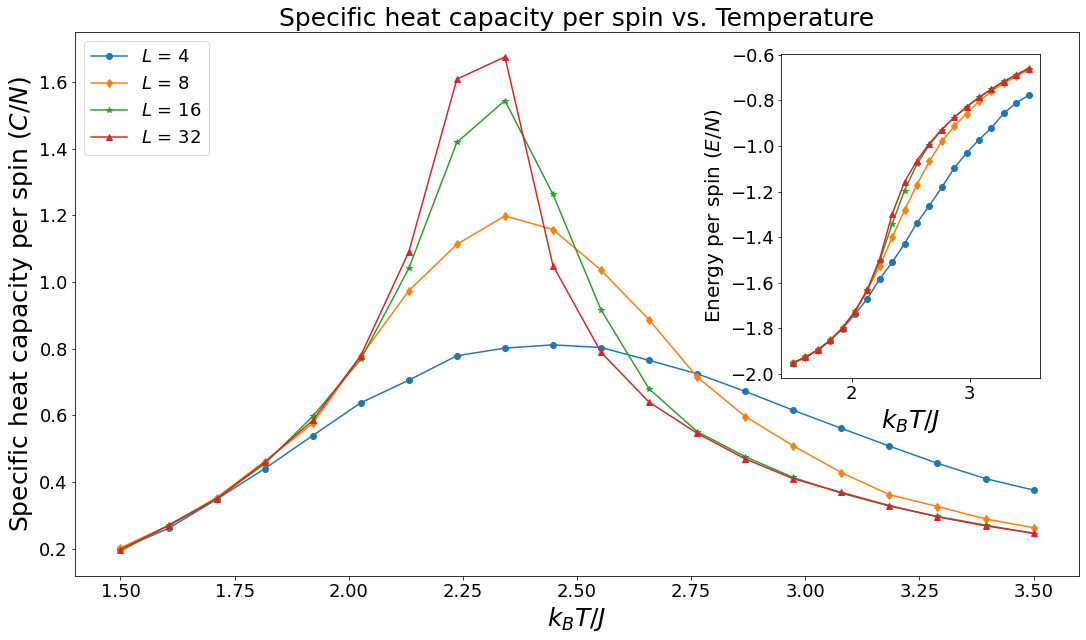

In [72]:
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.67,0.4,0.2,0.45]
ax2 = fig.add_axes([left, bottom, width, height])
mark = ['o', 'd', '*', '^']
lat_size = [4, 8, 16, 32]

nmeas = 20 
nwarmup= 10**3
nsteps = 10**5

for i in range(len(lat_size)):
    
    model = Ising(L = lat_size[i], nwarmup = nwarmup, nsteps = nsteps)
    T = np.linspace(1.5,3.5,nmeas)
    e_avg = [0]*nmeas
    spe_heat = [0]*nmeas
    n1 = 1/(model.N*nsteps)
    n2 = 1/(model.N*nsteps*nsteps)
    
    for t in range(nmeas):
        spinconf = model.initialize() # initialize spin config
        pw = model.precom_expo(T[t]) # initialize precom exponents
        avg = model.mcsweeps(spinconf,pw) # perform mc sweeps

        # average observables
        e_avg[t] =  avg[0]*n1
        spe_heat[t] = (avg[1]*n1 - n2*avg[0]*avg[0])/T[t]**2
    
    # convert to pandas series for plotting
    eavg = pd.Series(e_avg, index = T)
    cv = pd.Series(spe_heat, index = T)
    cv.plot(marker = mark[i], label = r"$L$ = {}".format(lat_size[i]), ax = ax1)
    eavg.plot(marker = mark[i], ax = ax2)

ax1.set_xlabel(r'$k_BT/J$', fontsize = 25)
ax1.set_ylabel(r'Specific heat capacity per spin ($C/N$)', fontsize = 25)
ax1.set_title(r'Specific heat capacity per spin vs. Temperature', fontsize = 25)
ax1.legend(loc = 'upper left')
ax2.set_xlabel(r'$k_BT/J$', fontsize = 25)
ax2.set_ylabel(r'Energy per spin ($E/N$)', fontsize = 20)
plt.savefig('../img/fig1.png')
plt.savefig('../img/fig1.pdf')
plt.show()

## Magnetic Susceptibility and Magnetization

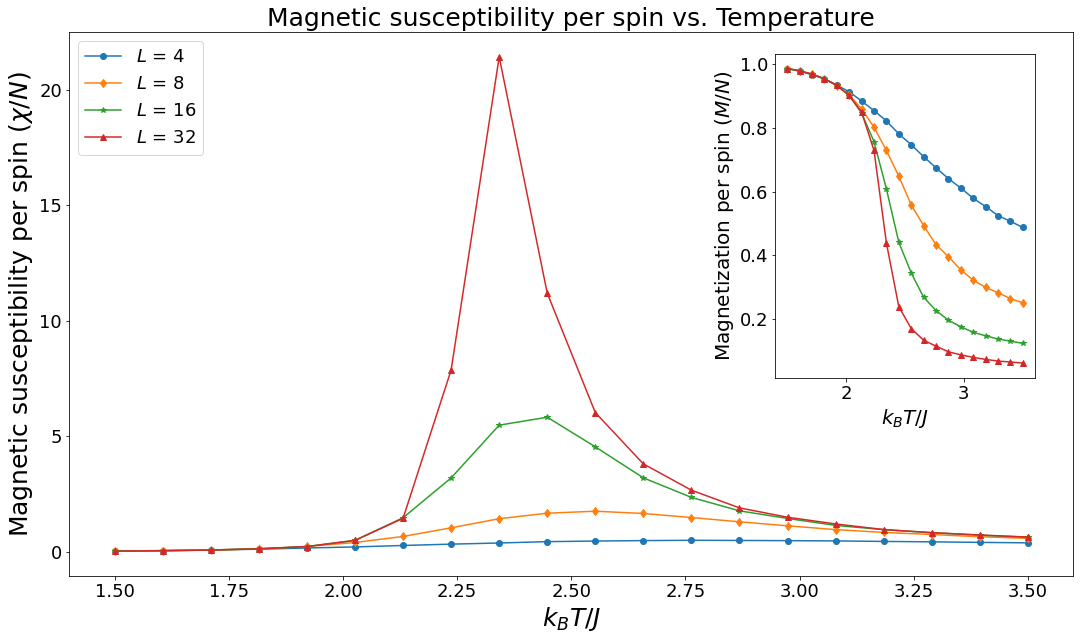

In [71]:
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.67,0.4,0.2,0.45]
ax2 = fig.add_axes([left, bottom, width, height])
mark = ['o', 'd', '*', '^']
lat_size = [4, 8, 16, 32]

nmeas = 20 
nwarmup= 10**3
nsteps = 10**5

for i in range(len(lat_size)):
    
    model = Ising(L = lat_size[i], nwarmup = nwarmup, nsteps = nsteps)
    T = np.linspace(1.5,3.5,nmeas)
    mabs_avg = [0]*nmeas
    chi = [0]*nmeas
    n1 = 1/(model.N*nsteps)
    n2 = 1/(model.N*nsteps*nsteps)

    for t in range(nmeas):
        spinconf = model.initialize() # initialize spin config
        pw = model.precom_expo(T[t]) # initialize precom exponents
        avg = model.mcsweeps(spinconf,pw) # perform mc sweeps

        # average observables
        mabs_avg[t] = avg[4]*n1
        chi[t] = (avg[3]*n1 - n2*avg[4]*avg[4])/T[t]
    
    # convert to pandas series for plotting
    mabsavg = pd.Series(mabs_avg, index = T)
    X = pd.Series(chi, index = T)
    X.plot(marker = mark[i], label = r"$L$ = {}".format(lat_size[i]), ax = ax1)
    mabsavg.plot(marker = mark[i], ax = ax2)

ax1.set_xlabel(r'$k_BT/J$', fontsize = 25)
ax1.set_ylabel(r'Magnetic susceptibility per spin ($\chi/N$)', fontsize = 25)
ax1.set_title(r'Magnetic susceptibility per spin vs. Temperature', fontsize = 25)
ax1.legend(loc = 'upper left')
ax2.set_xlabel(r'$k_BT/J$', fontsize = 20)
ax2.set_ylabel(r'Magnetization per spin ($M/N$)', fontsize = 20)
plt.savefig('../img/fig2.png')
plt.savefig('../img/fig2.pdf')
plt.show()

## Finite-Size Scaling

In [73]:
nwarmup= 10**3
nsteps = 2*10**5
lat_size = [4, 8, 16, 32]

T = 2/np.log(1 + np.sqrt(2)) # temperature at Tc
mabs_avg = [0]*len(lat_size)
chi = [0]*len(lat_size)
cv = [0]*len(lat_size)
    
for i in range(len(lat_size)):
    
    model = Ising(L = lat_size[i], nwarmup = nwarmup, nsteps = nsteps)
    spinconf = model.initialize() # initialize spin config
    pw = model.precom_expo(T) # initialize precom exponents
    avg = model.mcsweeps(spinconf,pw) # perform mc sweeps

    # average observables
    n1 = 1/(model.N*nsteps)
    n2 = 1/(model.N*nsteps*nsteps)
    mabs_avg[i] = avg[4]*n1
    chi[i] = (avg[3]*n1 - n2*avg[4]*avg[4])/T
    cv[i] = (avg[1]*n1 - n2*avg[0]*avg[0])/T**2

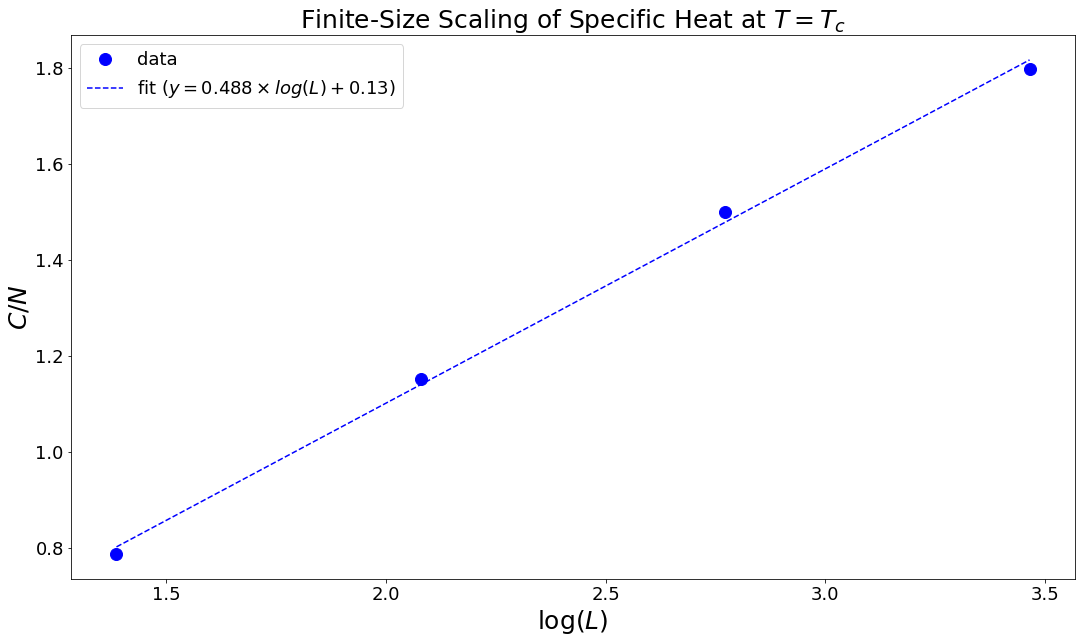

In [74]:
# plot data
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(np.log(lat_size), cv, color = 'b', marker = 'o', markersize = 12,
        linestyle = " ", label = 'data')

# fit data
m, c = np.polyfit(np.log(lat_size), cv, 1) # extract slope and intercept
ax.plot(np.log(lat_size), m*np.log(lat_size) + c,  color = 'b', linestyle = "--", 
        label = r'fit ($y = {0:.3g}\times log(L) + {1:.2g} $)'.format(m,c))

ax.set_ylabel(r'$C/N$', fontsize = 25)
ax.set_xlabel(r'log($L$)', fontsize = 25)
ax.set_title(r'Finite-Size Scaling of Specific Heat at $T=T_c$', fontsize = 25)
ax.legend(loc = 'upper left')
plt.savefig('../img/fig3.png')
plt.savefig('../img/fig3.pdf')
plt.show()